In [1]:
!pip install googletrans==3.1.0a0
!pip install --upgrade diffusers transformers -q


In [2]:
from googletrans import Translator
from pathlib import Path
import tqdm
import torch
import pandas as pd
import numpy as np
from diffusers import StableDiffusionPipeline
from transformers import pipeline, set_seed
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import cv2

In [3]:

def get_translation(text,dest_lang):
  translator = Translator()
  translated_text = translator.translate(text, dest=dest_lang)
  return translated_text.text


In [4]:
class CFG:
    device = "cuda"
    seed = 42
    generator = torch.Generator(device).manual_seed(seed)
    image_gen_steps = 35
    image_gen_model_id = "stabilityai/stable-diffusion-2"
    image_gen_size = (900,900)
    image_gen_guidance_scale = 9
    prompt_gen_model_id = "gpt3"
    prompt_dataset_size = 6
    prompt_max_length = 12

In [5]:
image_gen_model = StableDiffusionPipeline.from_pretrained(
    CFG.image_gen_model_id, torch_dtype=torch.float16,
    revision="fp16", use_auth_token='your_hugging_face_auth_token', guidance_scale=9
)
image_gen_model = image_gen_model.to(CFG.device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found
Keyword arguments {'use_auth_token': 'your_hugging_f

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [6]:
def generate_image(prompt, model):
    prompt = get_translation(prompt,"en")
    image = model(
        prompt, num_inference_steps=CFG.image_gen_steps,
        generator=CFG.generator,
        guidance_scale=CFG.image_gen_guidance_scale
    ).images[0]

    image = image.resize(CFG.image_gen_size)
    return image


  0%|          | 0/35 [00:00<?, ?it/s]

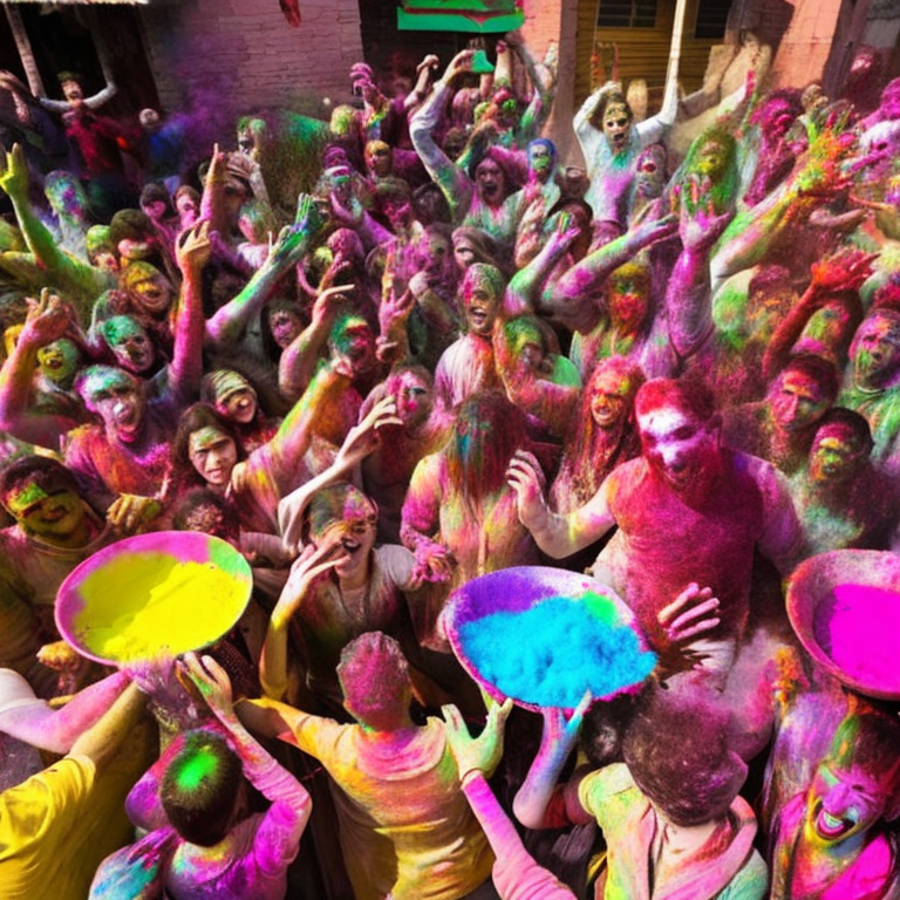

In [14]:
translation = "ప్రజలు హోలీ జరుపుకుంటున్నారు"
generate_image(translation, image_gen_model)

In [8]:
!pip install gradio

  Using cached httpx-0.27.0-py3-none-any.whl (75 kB)
  Using cached httpcore-1.0.4-py3-none-any.whl (77 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)
  Attempting uninstall: h11
    Found existing installation: h11 0.9.0
    Uninstalling h11-0.9.0:
      Successfully uninstalled h11-0.9.0
  Attempting uninstall: httpcore
    Found existing installation: httpcore 0.9.1
    Uninstalling httpcore-0.9.1:
      Successfully uninstalled httpcore-0.9.1
  Attempting uninstall: httpx
    Found existing installation: httpx 0.13.3
    Uninstalling httpx-0.13.3:
      Successfully uninstalled httpx-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
googletrans 3.1.0a0 requires httpx==0.13.3, but you have httpx 0.27.0 which is incompatible.


In [9]:
import os
import io
from IPython.display import Image, display, HTML
from PIL import Image
import base64


In [18]:
import gradio as gr

def gen_img(input):
    output = generate_image(input,image_gen_model)
    return output

gr.close_all()
demo = gr.Interface(fn=gen_img,
                    inputs=[gr.Textbox(label="Enter Your Prompt", lines=3)],
                    outputs=[gr.Image(label="Here's Your Image")],
                    title="ImageGen with AI",
                    #description="Summarize any text using the `shleifer/distilbart-cnn-12-6` model under the hood!"
                   )
demo.launch(share=True)

Closing server running on port: 7860
Closing server running on port: 7860
Closing server running on port: 7860
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://300e2872f5a5bda8c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
